In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('/content/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [21]:
df.tail()

,value
date,
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144
2019-12-03,158549


In [22]:
df['value'].describe()

count    1.304000e+03
mean     6.722068e+04
std      5.933964e+04
min      1.201000e+03
25%      3.575775e+04
50%      5.719750e+04
75%      8.388300e+04
max      1.173655e+06
Name: value, dtype: float64

In [23]:
df.shape

(1304, 1)

In [24]:
df = df.loc[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]
df.shape

(1238, 1)

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

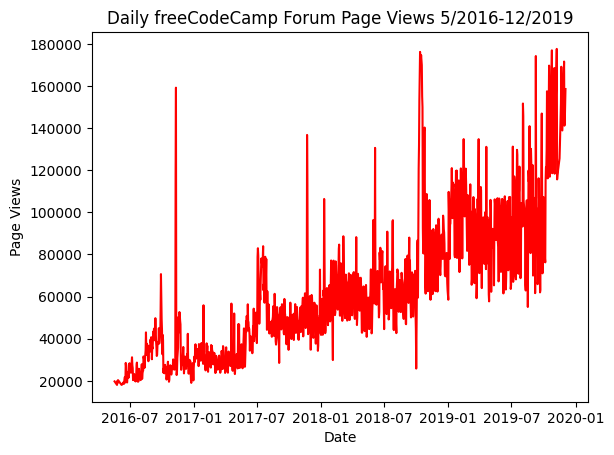

In [30]:
plt.plot(df['value'], 'r')
plt.figsize()
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [31]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [75]:
df.index.month

Index([ 5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
       ...
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12],
      dtype='int32', name='date', length=1238)

In [76]:
df.index.year

Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       ...
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
      dtype='int32', name='date', length=1238)

<Axes: xlabel='date', ylabel='value'>

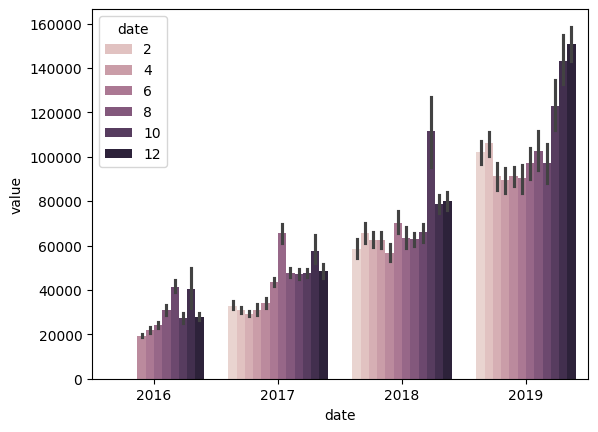

In [77]:
sns.barplot(df, x=df.index.year,y='value',hue=df.index.month, hue_order=[1,2,3,4,5,6,7,8,9,10,11,12])

In [95]:
df['year'] = df.index.year
df['month']=df.index.month
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name()
df['day']=df.index.day
df

,value,year,month,day
date,,,,
2016-05-19,19736,2016,May,19
2016-05-26,18060,2016,May,26
2016-05-27,19997,2016,May,27
2016-05-28,19044,2016,May,28
2016-05-29,20325,2016,May,29
...,...,...,...,...
2019-11-24,138875,2019,November,24
2019-11-29,171584,2019,November,29
2019-11-30,141161,2019,November,30


<Axes: xlabel='year', ylabel='value'>

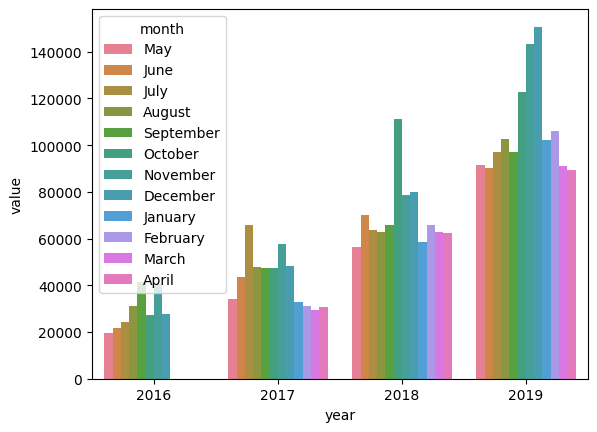

In [100]:
sns.barplot(df, x='year',y='value',hue='month', errorbar=None)

In [97]:
df_2 = df.groupby(['year', 'month'], sort=False)['value'].mean()
df_2 = df_2.reset_index()
df_2.rename(columns={'value':'Average Page Views','year':'Year','month':'Months'}, inplace=True)
df_2

,Year,Months,Average Page Views
0,2016,May,19432.400000
1,2016,June,21875.105263
2,2016,July,24109.678571
3,2016,August,31049.193548
4,2016,September,41476.866667
5,2016,October,27398.322581
6,2016,November,40448.633333
7,2016,December,27832.419355
8,2017,January,32785.161290
9,2017,February,31113.071429


<Axes: xlabel='Year', ylabel='Average Page Views'>

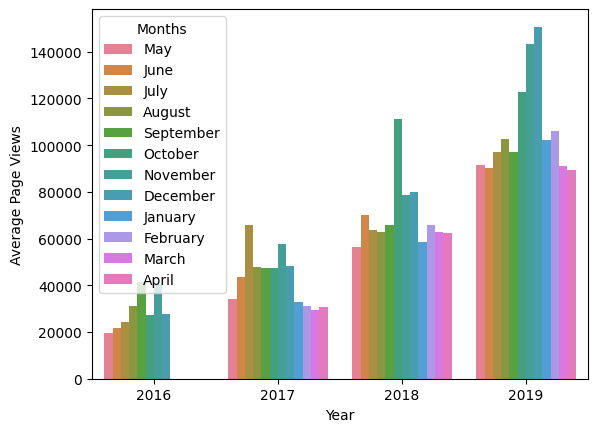

In [98]:
sns.barplot(df_2, x='Year',y='Average Page Views',hue='Months')

In [62]:
data = [
    {'Year':2016, 'Months':'January','Average Page Views':0},
    {'Year':2016, 'Months':'February','Average Page Views':0},
    {'Year':2016, 'Months':'March','Average Page Views':0},
    {'Year':2016, 'Months':'April','Average Page Views':0}
]
df_2 = pd.concat([pd.DataFrame(data), df_2], ignore_index=True)
df_2

,Year,Months,Average Page Views
0,2016,January,0.000000
1,2016,February,0.000000
2,2016,March,0.000000
3,2016,April,0.000000
4,2016,May,19432.400000
5,2016,June,21875.105263
6,2016,July,24109.678571
7,2016,August,31049.193548
8,2016,September,41476.866667
9,2016,October,27398.322581


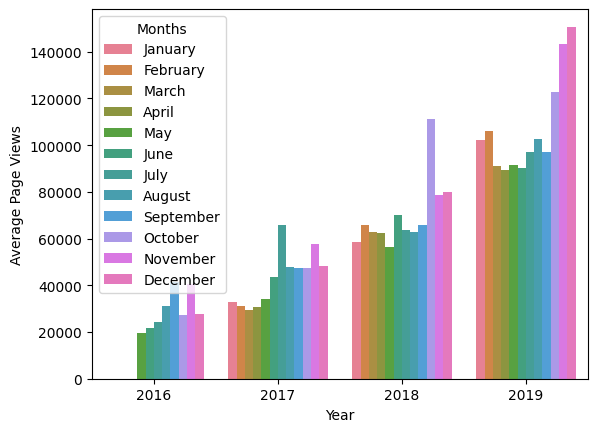

In [64]:
bar = sns.barplot(df_2, x='Year',y='Average Page Views',hue='Months')

In [66]:
dfa = pd.read_csv('/content/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df_box = dfa.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-09,1201,2016,May
1,2016-05-10,2329,2016,May
2,2016-05-11,1716,2016,May
3,2016-05-12,10539,2016,May
4,2016-05-13,6933,2016,May
...,...,...,...,...
1299,2019-11-29,171584,2019,Nov
1300,2019-11-30,141161,2019,Nov
1301,2019-12-01,142918,2019,Dec
1302,2019-12-02,220144,2019,Dec


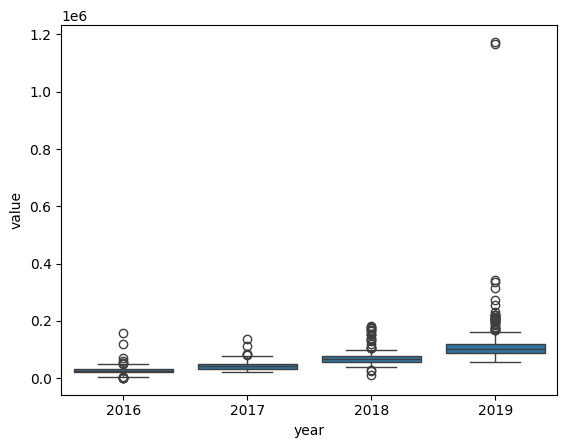

In [71]:
# figure, axis = plt.subplots(1, 2)

# axis[0] = sns.boxplot(x='year',y='value', data=df_box)
# axis[1] = sns.boxplot(x='month',y='value', data=df_box)

fig = sns.boxplot(x='year',y='value', data=df_box)


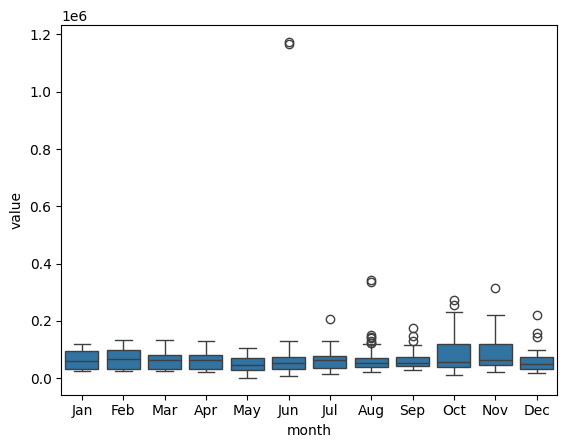

In [73]:
fig2 = sns.boxplot(x='month',y='value', data=df_box , order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

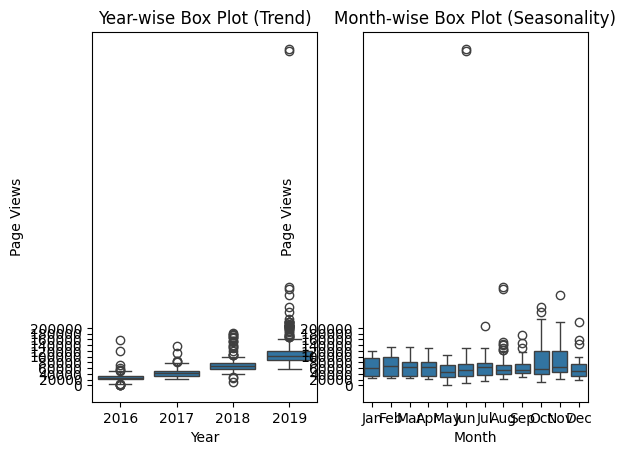

In [94]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x='year',y='value', data=df_box, ax=axs[0])
sns.boxplot(x='month',y='value', data=df_box , order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=axs[1])
axs[0].set_title('Year-wise Box Plot (Trend)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Page Views')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Page Views')
# axs[0].set_ylim=((0,200000))
axs[0].set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000])
axs[1].set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000])
axs[1].set_title('Month-wise Box Plot (Seasonality)')

Text(0, 0.5, 'Average Page Views')

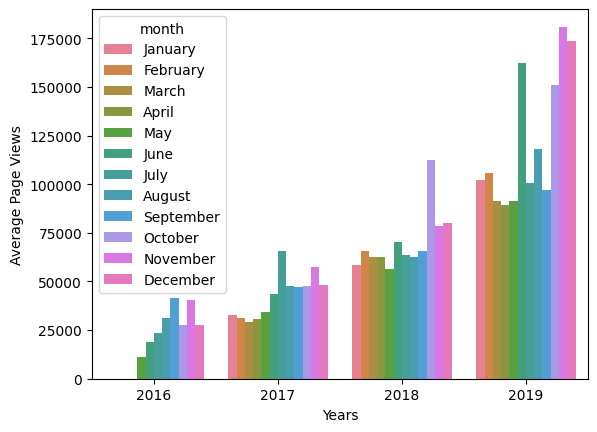

In [101]:
df_bar = pd.read_csv('/content/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df_bar['year'] = df_bar.index.year
df_bar['month']=df_bar.index.month
df_bar['month'] = pd.to_datetime(df_bar['month'], format='%m').dt.month_name()

# Draw bar plot
fig, ax = plt.subplots()
sns.barplot(x='year',y='value', data=df_bar,hue='month', errorbar=None, ax=ax, hue_order=['January','February','March','April','May','June','July','August','September','October','November','December'])
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')

In [108]:
import matplotlib
print([rect for rect in ax.get_children() if isinstance(rect, matplotlib.patches.Rectangle)])

[<matplotlib.patches.Rectangle object at 0x7cbe956ccb50>, <matplotlib.patches.Rectangle object at 0x7cbe956ced40>, <matplotlib.patches.Rectangle object at 0x7cbe956cf220>, <matplotlib.patches.Rectangle object at 0x7cbe956cc7f0>, <matplotlib.patches.Rectangle object at 0x7cbe956cd120>, <matplotlib.patches.Rectangle object at 0x7cbe96033760>, <matplotlib.patches.Rectangle object at 0x7cbe956cc970>, <matplotlib.patches.Rectangle object at 0x7cbe956cc6d0>, <matplotlib.patches.Rectangle object at 0x7cbe960301f0>, <matplotlib.patches.Rectangle object at 0x7cbe956cec80>, <matplotlib.patches.Rectangle object at 0x7cbe956cc6a0>, <matplotlib.patches.Rectangle object at 0x7cbe960330a0>, <matplotlib.patches.Rectangle object at 0x7cbe956cd0c0>, <matplotlib.patches.Rectangle object at 0x7cbe956cda80>, <matplotlib.patches.Rectangle object at 0x7cbe96cce650>, <matplotlib.patches.Rectangle object at 0x7cbe96ccce80>, <matplotlib.patches.Rectangle object at 0x7cbe96032440>, <matplotlib.patches.Rectangle 

In [ ]:
'''
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# Clean data
df = df.loc[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots()
    ax.plot(df['value'], 'r')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month']=df_bar.index.month
    df_bar['month'] = pd.to_datetime(df_bar['month'], format='%m').dt.month_name()

    # Draw bar plot
    fig, ax = plt.subplots()
    sns.barplot(x='year',y='value', data=df_bar,hue='month', errorbar=None, ax=ax, hue_order=['January','February','March','April','May','June','July','August','September','October','November','December'])
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axs = plt.subplots(ncols=2)

    sns.boxplot(x='year',y='value', data=df_box, ax=axs[0])
    axs[0].set_title('Year-wise Box Plot (Trend)')
    axs[0].set_xlabel('Year')
    axs[0].set_ylabel('Page Views')

    sns.boxplot(x='month',y='value', data=df_box , order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=axs[1])
    axs[1].set_title('Month-wise Box Plot (Seasonality)')
    axs[1].set_xlabel('Month')
    axs[1].set_ylabel('Page Views')

    # axs[0].set_ylim=((0,200000))
    # axs[0].set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000])
    # axs[1].set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000])

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
'''